In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("/content/loan_data.csv")
print(df)

      credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [ ]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [ ]:
# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    print(df)

      credit.policy  purpose  int.rate  installment  log.annual.inc    dti  \
0                 1        2    0.1189       829.10       11.350407  19.48   
1                 1        1    0.1071       228.22       11.082143  14.29   
2                 1        2    0.1357       366.86       10.373491  11.63   
3                 1        2    0.1008       162.34       11.350407   8.10   
4                 1        1    0.1426       102.92       11.299732  14.97   
...             ...      ...       ...          ...             ...    ...   
9573              0        0    0.1461       344.76       12.180755  10.39   
9574              0        0    0.1253       257.70       11.141862   0.21   
9575              0        2    0.1071        97.81       10.596635  13.09   
9576              0        4    0.1600       351.58       10.819778  19.18   
9577              0        2    0.1392       853.43       11.264464  16.28   

      fico  days.with.cr.line  revol.bal  revol.util  inq.last.

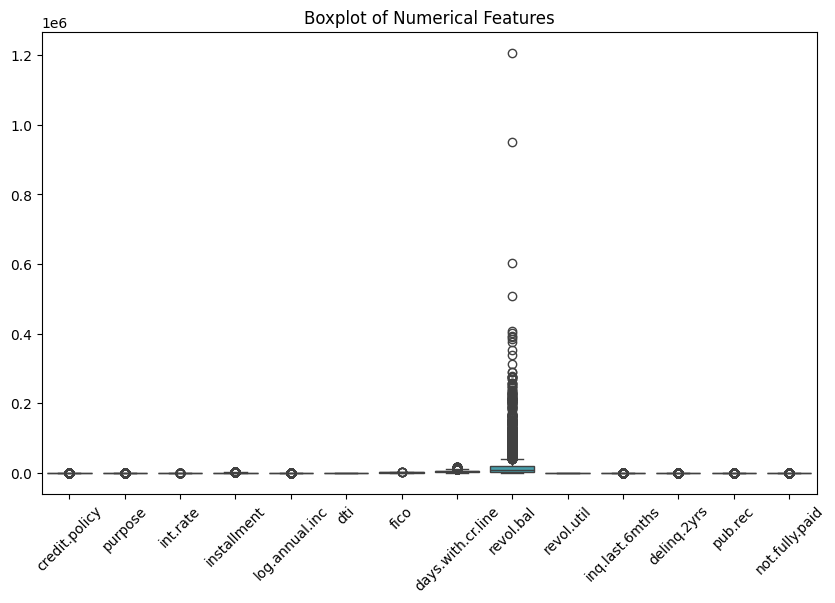

In [ ]:
# Visualize outliers with boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Handle outliers
from scipy.stats import zscore

z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
abs_z_scores = abs(z_scores)
threshold = 3
outliers_mask = (abs_z_scores > threshold).any(axis=1)
df = df[~outliers_mask]

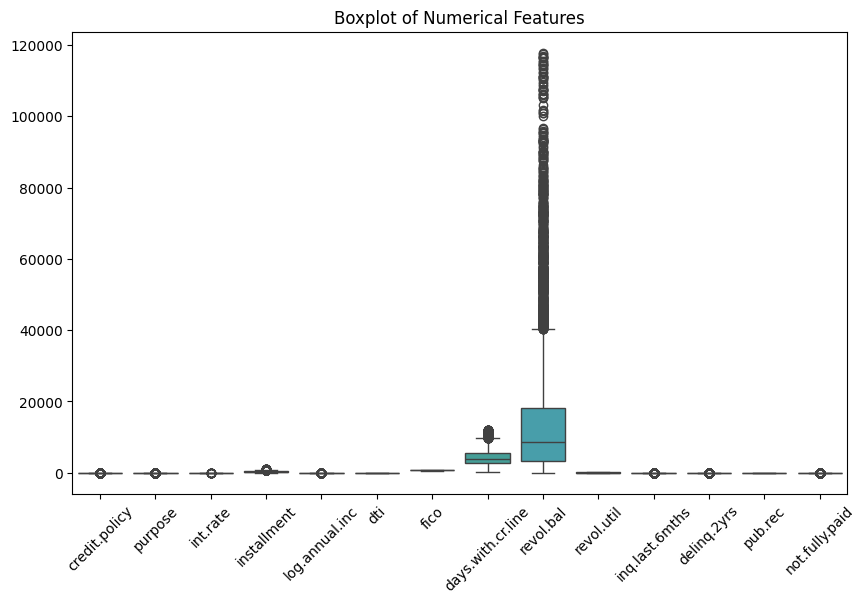

In [ ]:
# Visualize outliers with boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Perform feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Check unique values of the target variable
print("Unique values of target variable:", df['not.fully.paid'].unique())

# Check data types of the target variable
print("Data type of target variable:", df['not.fully.paid'].dtype)

# Convert target variable to integer type
df['not.fully.paid'] = df['not.fully.paid'].astype(int)


Unique values of target variable: [-0.41942741  2.38420279]
Data type of target variable: float64


In [ ]:
# Splitting the dataset into features and target
X = df.drop(columns=['not.fully.paid'])
y = df['not.fully.paid']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define and train the decision tree classifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [ ]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1411    0]
 [ 246    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1411
           2       0.00      0.00      0.00       246

    accuracy                           0.85      1657
   macro avg       0.43      0.50      0.46      1657
weighted avg       0.73      0.85      0.78      1657



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


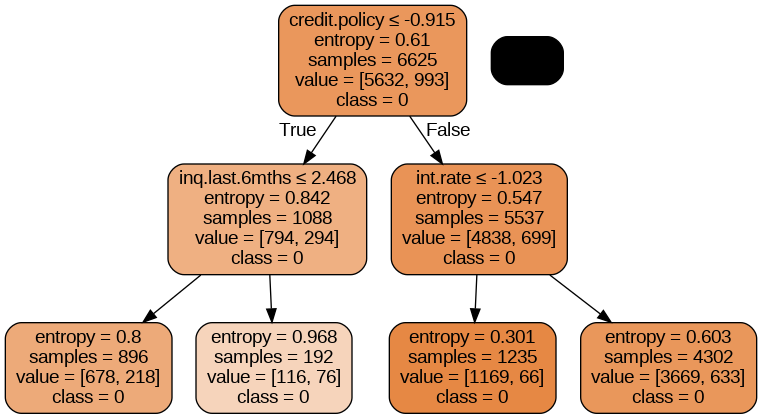

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Assuming 'model' is your decision tree model
# You can replace 'model' with the variable name of your actual model
# Make sure you've already trained the model before visualizing it

# Generate DOT data
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,class_names=['0','1'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# To save the visualization to a file
graph.write_png("decision_tree.png")

# To display the visualization in Jupyter Notebook
Image(graph.create_png())

In [ ]:
# Define and train the decision tree classifier
model = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

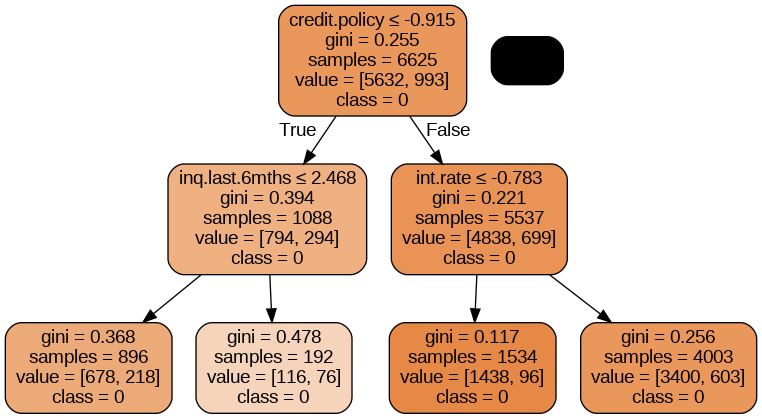

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Assuming 'model' is your decision tree model
# You can replace 'model' with the variable name of your actual model
# Make sure you've already trained the model before visualizing it

# Generate DOT data
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,class_names=['0','1'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# To save the visualization to a file
graph.write_png("decision_tree.png")

# To display the visualization in Jupyter Notebook
Image(graph.create_png())

In [ ]:
# Define and train the decision tree classifier
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

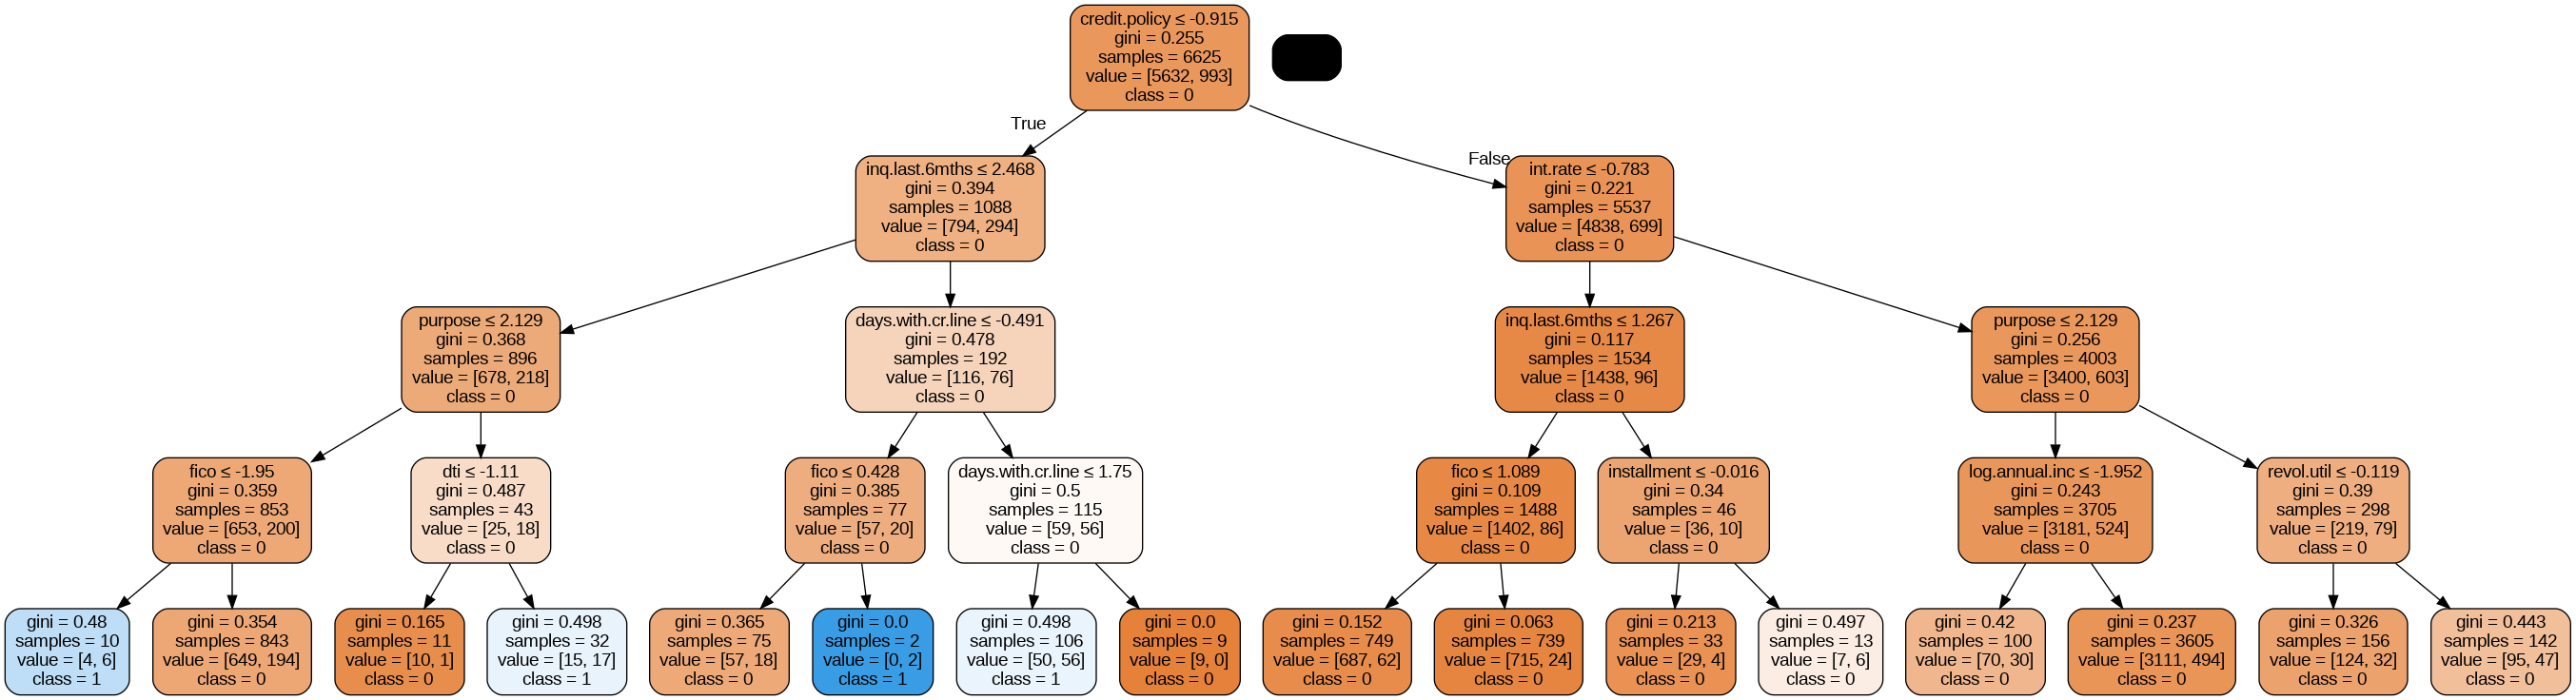

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Assuming 'model' is your decision tree model
# You can replace 'model' with the variable name of your actual model
# Make sure you've already trained the model before visualizing it

# Generate DOT data
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,class_names=['0','1'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# To save the visualization to a file
graph.write_png("decision_tree.png")

# To display the visualization in Jupyter Notebook
Image(graph.create_png())

In [ ]:
# Estimating Class Probabilities
probabilities = model.predict_proba(X_test)
print("Estimated class probabilities:\n", probabilities)

Estimated class probabilities:
 [[0.85285914 0.14714086]
 [0.85285914 0.14714086]
 [0.75669643 0.24330357]
 ...
 [0.9465587  0.0534413 ]
 [0.85285914 0.14714086]
 [0.75669643 0.24330357]]


Predicted values: [0.16726401 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401
 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401
 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401
 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401
 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401
 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401
 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401
 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401
 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401
 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401
 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401
 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401
 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401
 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401 0.16726401
 0.16726401 0.16726401 0.16726401 0.16726401

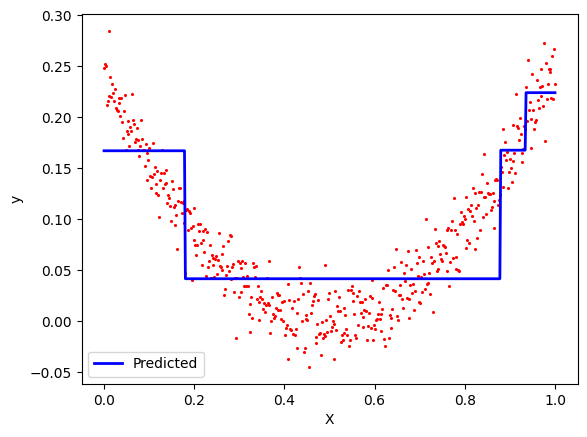

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt

# Generate some synthetic data
X = np.linspace(start=0, stop=1, num=500)
y = (X - 0.5) ** 2 + np.random.randn(500) / 50

# Plot the data
plt.scatter(X, y, s=1.5, c='red')

# Train the decision tree regression model
model = DecisionTreeRegressor(max_depth=2)
model.fit(X.reshape(-1, 1), y)

# Export graphviz
dot_data = export_graphviz(model, out_file=None,
                           feature_names=['X'],
                           filled=True, rounded=True,
                           special_characters=True)

# Print the predicted values
predicted = model.predict(X.reshape(-1, 1))
print("Predicted values:", predicted)

# Plot the predicted values
plt.plot(X, predicted, linewidth=2, color='blue', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
